In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#from sklearn.inspection.permutation_importance import 
#from sklearn.dummy import dummy_classfier

#adabooste
#catboostclass
#algo de réseau de neurones?

In [12]:

from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, LabelEncoder,StandardScaler, Normalizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,StratifiedKFold,KFold,RandomizedSearchCV,GridSearchCV


from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score,plot_confusion_matrix,confusion_matrix,accuracy_score,plot_roc_curve,
from sklearn.metrics import balanced_accuracy_score

from scipy.stats import randint

In [2]:
#paramétrage de jupyter pour mieux voir;
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 105)

In [26]:
df = pd.read_csv("vispremv.txt",sep=" ")

In [4]:
# première visu
df.head()

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq  \
148009  Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0   
552427  Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0   
556005  Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0   
556686  Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1   
642680  Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0   

       endetq gagetq facanq lgagtq havefq jnbjdq ageq relatq qsmoyq opgnbq  \
148009     E1     G1     F1     L0     H1     J1   A2     R2     Q2     O0   
552427     E0     G0     F1     L0     H0     J0   A2     R1     Q0     O0   
556005     E0     G0     F0     L0     H0     J0   A0     R1     Q2     O0   
556686     E0     G1     F0     L0     H1     J1   A1     R1     Q2     O0   
642680     E0     G0     F0     L0     H0     J1   A2     R2     Q1     O2   

       moyrvq tavepq dmvtpq boppnq itavcq  RELAT  AGER    OPGNBL    MOYRVL  \
148009     M2     T2     D0     B2     I2    238    51  0.000000  4.753590   
552427     M2     T1     D1     B0     I2    139    58  0.000000  3.713572   
556005     M1     T2     D0     B1     I2     99    27  0.000000  2.890372   
556686     M2     T2     D0     B2     I2     89    49  0.000000  5.926926   
642680     M2     T2     D0     B2     I2    216    64  1.791759  3.218876   

           TAVEPL    ENDETL     GAGETL    GAGECL     GAGEML  KVUNB  QSMOY  \
148009  13.461603  1.609438  11.688701   0.00000  11.688701      2  35938   
552427   8.132413  0.000000   0.000000   0.00000   0.000000      1   1336   
556005  11.242717  0.000000   0.000000   0.00000   0.000000      1  12221   
556686  13.067592  0.000000  12.250391  10.54165  12.050611      1  21187   
642680  11.270382  0.000000   0.000000   0.00000   0.000000      1   7154   

          QCREDL    DMVTPL    BOPPNL     FACANL  LGAGTL  VIENB     VIEMTL  \
148009  4.744932  2.484907  3.912023  12.235714     0.0      1  11.935123   
552427  3.713572  2.708050  1.098612   8.130059     0.0      0   0.000000   
556005  2.890372  2.484907  3.178054   0.000000     0.0      0   0.000000   
556686  5.342334  2.484907  3.912023   0.000000     0.0      1   9.972267   
642680  3.218876  2.484907  4.219508   0.000000     0.0      0   0.000000   

        UEMNB  XLGNB     XLGMTL  YLVNB     YLVMTL  ROCNB  NPTAG     ITAVCL  \
148009      4      2  13.161865      2  12.110635     14      0  14.080718   
552427      1      0   0.000000      1   8.132413      0      0  11.717872   
556005      3      1  10.743178      2  10.309286     14      0  11.329303   
556686      5      3  12.899220      2  11.203025     11      1  13.111856   
642680      4      1  10.457976      2   9.190546     27      0  11.304904   

           HAVEFL    JNBJDL CARVP  
148009  13.230263  0.693147  Coui  
552427   0.000000  0.000000  Coui  
556005   0.000000  0.000000  Coui  
556686   9.972267  2.772589  Coui  
642680   0.000000  1.386294  Coui

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
profile.to_file("your_report.html")

In [17]:
var_create = [x for x in df.columns if x.endswith('q')]

var_quali = ['SEXEQ', 'FAMIQ', 'PCSPQ']

var_quanti = [x for x in df.columns if x not in var_create + var_quali+['CARVP']]

In [8]:
# Encodage de la valeur cherchée. On droppe la colonne source car elle est dans y maintenant
enc = LabelEncoder()
y = enc.fit_transform(df['CARVP'])
print(y)
X = df.drop(columns=['CARVP'])

[1 1 1 ... 0 0 0]


In [9]:
# Suppression des colonnes quali transformées. On prend les données brutes
def _drop_inutiles(X):
    return X.drop(columns=var_create)

In [10]:
# Pipeline avec l'estimator passé en paramètre
def get_estimator(estimator):
    col_drop = FunctionTransformer(_drop_inutiles)
    
    categorical_encoder = OrdinalEncoder()#One_hot_encoder à la place
    scaler =  StandardScaler()
    
    preprocessor = make_column_transformer(
        (categorical_encoder, var_quali),
        (scaler,var_quanti),
        remainder='passthrough',  # passthrough numerical columns as they are
    )
    

    return make_pipeline(col_drop, preprocessor, estimator)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
# BASELINE pour référence
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("Accuracy: ",  accuracy_score(y_test,dummy_clf.predict(X_test)))
print("F1 score", f1_score(y_test,dummy_clf.predict(X_test)))

Accuracy:  0.6654135338345865
F1 score 0.0


In [ ]:
# GRID SEARCH
model = get_estimator()
param_grid = {
    'gradientboostingclassifier__max_depth':[2, 3],
    'gradientboostingclassifier__n_estimators' : [80, 85, 90],
    'gradientboostingclassifier__max_features' : [14, 15, 16, 17, 18, 19, 20],   
    'gradientboostingclassifier__learning_rate': [0.4, 0.41, 0.42, 0.43, 0.44, 0.45]
}
grid = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1')
grid.fit(X_train, y_train);

In [ ]:
df_results = pd.DataFrame(grid.cv_results_)
columns_to_keep = [
    'param_gradientboostingclassifier__max_depth',
    'param_gradientboostingclassifier__n_estimators',
    'param_gradientboostingclassifier__max_features',
    'param_gradientboostingclassifier__learning_rate',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]
df_results = df_results[columns_to_keep]
df_results.sort_values(by='rank_test_score', ascending=True, axis='index')

Gradient Boost: Score moyen: 0.9191 +/- 0.0242
f1 score: 0.8255813953488371
Matrice de confusion:
[[165  12]
 [ 18  71]]


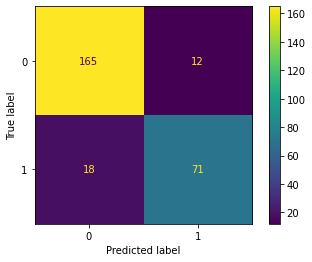

accuracy: 0.8872180451127819


In [18]:
# GRADIENT BOOST avec Cross val, après la grid search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
estimator = get_estimator(GradientBoostingClassifier(n_estimators=80, max_depth=2, max_features=20))
cv = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, X, y, cv=cv)
print(
    f"Gradient Boost: Score moyen: {np.mean(scores):.4f} +/- {np.std(scores):.4f}"
)

estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

# F1 SCORE
f1 = f1_score(y_test, y_predict)
print("f1 score:", f1)

# MATRICE DE CONFUSION
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(estimator, X_test, y_test)
plt.show()

# ACCURACY
accu = accuracy_score(y_test,y_predict )
print("accuracy:", accu)

# ROC CURVE
plot_roc_curve(estimator, X_test, y_test)

### suppression des lignes où les 8 variables problématiques sont égale à 0 en même temps

In [19]:
#suppression des lignes où toutes les variables sont égale à 0
df["nb_pdt"] = df[['KVUNB','VIENB','UEMNB','XLGNB','YLVNB']].sum(axis=1)
df["Mt_pdt"] = df[['VIEMTL','XLGNB','YLVMTL']].sum(axis=1)

df["MT_0"] = df[['OPGNBL','ENDETL','GAGETL','GAGECL','GAGEML','FACANL','XLGMTL','HAVEFL']].sum(axis = 1)
df["top_Mt_0"] = np.where(df["MT_0"]>0,1,0)

print(df.groupby(["top_Mt_0"])["CARVP"].value_counts())

print(df.groupby(["CARVP"])["top_Mt_0"].mean())

df_copy = df[df["top_Mt_0"]==1]

top_Mt_0  CARVP
0         Cnon     149
          Coui      17
1         Cnon     557
          Coui     340
Name: CARVP, dtype: int64
CARVP
Cnon    0.788952
Coui    0.952381
Name: top_Mt_0, dtype: float64


In [20]:
enc = LabelEncoder()
y = enc.fit_transform(df_copy['CARVP'])
print(y)
X = df_copy.drop(columns=['CARVP'])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Gradient Boost: Score moyen: 0.9118 +/- 0.0287
f1 score: 0.8780487804878048
Matrice de confusion:
[[133   7]
 [ 13  72]]


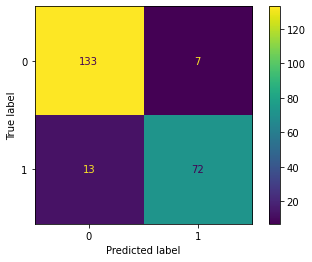

accuracy: 0.9111111111111111


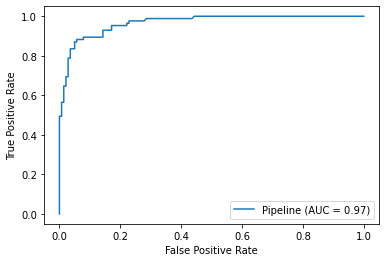

In [21]:
# GRADIENT BOOST avec Cross val, après la grid search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
estimator = get_estimator(GradientBoostingClassifier(n_estimators=80, max_depth=2, max_features=20))
cv = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, X, y, cv=cv)
print(
    f"Gradient Boost: Score moyen: {np.mean(scores):.4f} +/- {np.std(scores):.4f}"
)

estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

# F1 SCORE
f1 = f1_score(y_test, y_predict)
print("f1 score:", f1)

# MATRICE DE CONFUSION
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(estimator, X_test, y_test)
plt.show()

# ACCURACY
accu = accuracy_score(y_test,y_predict )
print("accuracy:", accu)

# ROC CURVE
plot_roc_curve(estimator, X_test, y_test)

### mise à NA lorsque les 8 variables problématiques sont égale à 0 en même temps
### gestion des NA (reste à faire)

In [27]:
df["MT_0"] = df[['OPGNBL','ENDETL','GAGETL','GAGECL','GAGEML','FACANL','XLGMTL','HAVEFL']].sum(axis = 1)
df["top_Mt_0"] = np.where(df["MT_0"]>0,1,0)
for x in ['OPGNBL','ENDETL','GAGETL','GAGECL','GAGEML','FACANL','XLGMTL','HAVEFL']:
    df[x]=np.where((df[x]==0) & (df["top_Mt_0"]==0),np.nan,df[x])

In [29]:
enc = LabelEncoder()
y = enc.fit_transform(df['CARVP'])
print(y)
X = df.drop(columns=['CARVP'])

[1 1 1 ... 0 0 0]


In [35]:
#stratégie de gestion des NAN.
var_imput = ['OPGNBL','ENDETL','GAGETL','GAGECL','GAGEML','FACANL','XLGMTL','HAVEFL']
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#a mettre dans la pipeline ==> Reste à faire.


In [38]:
# Pipeline avec l'estimator passé en paramètre
def get_estimator(estimator):
    col_drop = FunctionTransformer(_drop_inutiles)
    
    categorical_encoder = OrdinalEncoder()#One_hot_encoder à la place
    scaler =  StandardScaler()
    
    preprocessor = make_column_transformer(
        (categorical_encoder, var_quali),
        (scaler,var_quanti),
        remainder='passthrough',  # passthrough numerical columns as they are
    )
    

    return make_pipeline(col_drop, preprocessor, estimator)

In [39]:
# GRADIENT BOOST avec Cross val, après la grid search
X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.25, stratify=y)
estimator = get_estimator(GradientBoostingClassifier(n_estimators=80, max_depth=2, max_features=20))
cv = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, X, y, cv=cv)
print(
    f"Gradient Boost: Score moyen: {np.mean(scores):.4f} +/- {np.std(scores):.4f}"
)

estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

# F1 SCORE
f1 = f1_score(y_test, y_predict)
print("f1 score:", f1)

# MATRICE DE CONFUSION
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(estimator, X_test, y_test)
plt.show()

# ACCURACY
accu = accuracy_score(y_test,y_predict )
print("accuracy:", accu)

# ROC CURVE
plot_roc_curve(estimator, X_test, y_test)

C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py", line 409, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\LE

C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py", line 409, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\LE

Gradient Boost: Score moyen: nan +/- nan


C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py", line 409, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\LEVEXIE\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\LE

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

### gestion du déséquilibrage de données.

In [ ]:
from sklearn.datasets import make_classification from imblearn.over_sampling import SMOTE from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder from sklearn.compose import make_column_transformer

X_transform = X.copy()
X_transform[var_quali] = OrdinalEncoder().fit_transform(X_transform[var_quali])
X_transform[var_quanti] = StandardScaler().fit_transform(X_transform[var_quanti])

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_transform, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.7)
